# Lesson 14 - Multigroup Data Demo

 - mgxs data linked on canvas

In [10]:
ls mgxs/*

mgxs/2groupxs_eig.p    mgxs/361groupxs_fs.p  mgxs/mgspectrum.py
mgxs/2groupxs_fs.p     mgxs/70groupxs_eig.p
mgxs/361groupxs_eig.p  mgxs/70groupxs_fs.p


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
xs = pickle.load(open('mgxs/361groupxs_eig.p', 'rb'))
xs.keys()

dict_keys(['total', 'absorption', 'scattering', 'nufission', 'chi', 'group_edges'])

## Plot some values

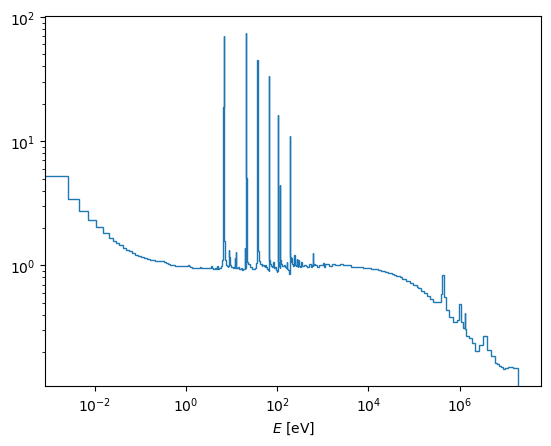

In [78]:
plt.stairs(xs['total'], edges=xs['group_edges'][::-1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$E$ [eV]');

## Find $\phi$ and $k_{\infty}$

In [74]:
ng = len(xs['total']) # number of groups

# define the matrices for (T-S)phi = (1/k)*chi*f'*phi
T = np.diag(xs['total'])
S = xs['scattering']
nF = xs['nufission']
A = xs['absorption']
X = xs['chi']
F = np.outer(X, nF)

# use numpy to solve the eigenproblem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(T-S)@F)
print(np.real(eigvals)[:3])
k_inf = eigvals[0] # the first eigenvalue *is* k_inf
phi = eigvecs[:, 0] # the corresponding eigenvector *is* phi

[ 1.30300794e+00 -9.89560858e-17  5.48753645e-17]


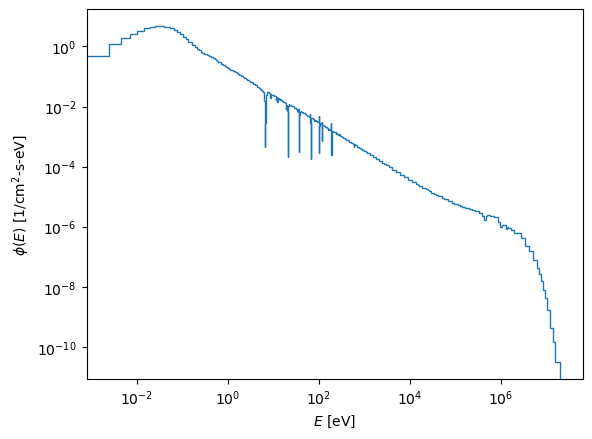

In [75]:
phi = phi[::-1] # reverse to match the group edges

phi = phi / np.diff(xs['group_edges']) # divide by the group widths to get per eV

plt.stairs(phi, edges=xs['group_edges'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$E$ [eV]')
plt.ylabel('$\phi(E)$ [1/cm$^2$-s-eV]')
plt.show()

# Try A "Fixed-Source" Version

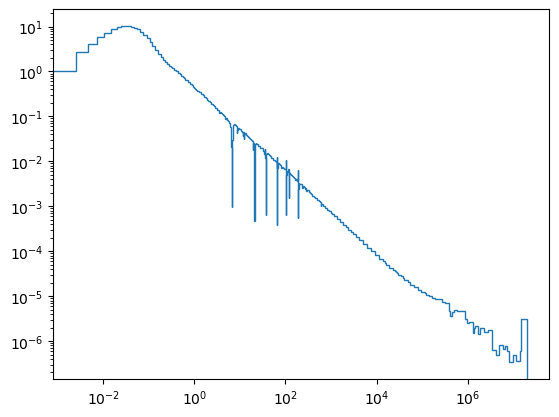

In [53]:
ng = len(xs['total'])

T = np.diag(xs['total'])
S = xs['scattering']
nF = xs['nufission']
A = xs['absorption']
X = xs['chi']
F = np.outer(X, nF)
M = T - S 

b = np.zeros(ng)
b[0] = 1 # delta source in fastest group

phi = np.linalg.solve(M, b)
phi = phi[::-1]

phi = phi / np.diff(xs['group_edges'])

plt.stairs(phi, edges=xs['group_edges'])
plt.xscale('log')
plt.yscale('log')
plt.show()